In [ ]:
import sys

!{sys.executable} -m pip install --quiet --disable-pip-version-check httpx matplotlib nexus-api

Create client and authenticate

In [6]:
from nexus_api import NexusAsyncClient

# You get this token in the user settings menu of Nexus.
access_token = "<token>"
base_url = "http://localhost:5000"
client = NexusAsyncClient.create(base_url)

client.sign_in(access_token)

Load data from sample catalog `/SAMPLE/LOCAL`

In [7]:
from datetime import datetime, timezone

begin   = datetime(2020, 1, 1, 0, 0, tzinfo=timezone.utc)
end     = datetime(2020, 1, 1, 0, 2, tzinfo=timezone.utc)

T1      = "/SAMPLE/LOCAL/T1/1_s"
T1_MEAN = "/SAMPLE/LOCAL/T1/5_s_mean"

data = await client.load(
    begin,
    end,
    resource_paths=[T1, T1_MEAN],
    on_progress=lambda progress: print(f"{progress * 100:3.0f} %: Loading")
)

t1 = data[T1]
t1_mean = data[T1_MEAN]

timestamps = [begin + t1.sample_period * x for x in range(0, len(t1.values))]
timestamps_mean = [begin + t1_mean.sample_period * x for x in range(0, len(t1_mean.values))]

Loading:  50 %
Loading: 100 %


Plot data

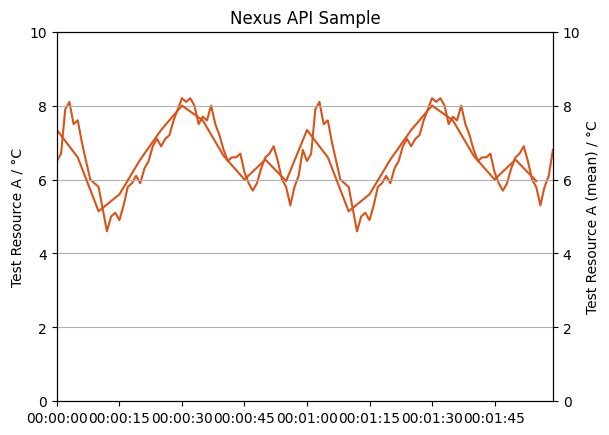

In [8]:
import matplotlib.pyplot as plt

r1 = plt.gca()
r1.plot(timestamps, t1.values, color=(0.0000, 0.4470, 0.7410))
r1.set_ylabel(f"{t1.description} / {t1.unit}")
r1.set_ylim(0, 10)

r2 = r1.twinx()
r2.plot(timestamps_mean, t1_mean.values, color=(0.8500, 0.3250, 0.0980))
r2.set_ylabel(f"{t1.description} (mean) / {t1.unit}")
r2.set_ylim(0, 10)

plt.title("Nexus API Sample")
plt.xlabel("Time")
plt.xlim(timestamps[0], timestamps[-1])
plt.grid()
plt.show()